<a href="https://colab.research.google.com/github/KushBagri/Deep_Learning/blob/main/BCDvNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [3]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [4]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)


In [6]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data_frame['label'] = breast_cancer_dataset.target

In [8]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
data_frame.shape


(569, 31)

In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [12]:
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [13]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [14]:
X = data_frame.drop(columns = 'label', axis = 1)
Y = data_frame['label']

In [15]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [20]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [22]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [23]:
history = model.fit(X_train_std, Y_train, validation_split = 0.1, epochs = 12)

Epoch 1/12
13/13 [==============================] - 1s 20ms/step - loss: 0.9773 - accuracy: 0.2372 - val_loss: 0.9107 - val_accuracy: 0.3913
Epoch 2/12
13/13 [==============================] - 0s 4ms/step - loss: 0.7285 - accuracy: 0.4572 - val_loss: 0.7176 - val_accuracy: 0.6304
Epoch 3/12
13/13 [==============================] - 0s 4ms/step - loss: 0.5628 - accuracy: 0.7090 - val_loss: 0.5801 - val_accuracy: 0.8261
Epoch 4/12
13/13 [==============================] - 0s 4ms/step - loss: 0.4468 - accuracy: 0.8631 - val_loss: 0.4811 - val_accuracy: 0.8478
Epoch 5/12
13/13 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy: 0.9169 - val_loss: 0.3970 - val_accuracy: 0.8478
Epoch 6/12
13/13 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.9291 - val_loss: 0.3310 - val_accuracy: 0.8913
Epoch 7/12
13/13 [==============================] - 0s 4ms/step - loss: 0.2603 - accuracy: 0.9291 - val_loss: 0.2751 - val_accuracy: 0.9348
Epoch 8/12
13/13 [=

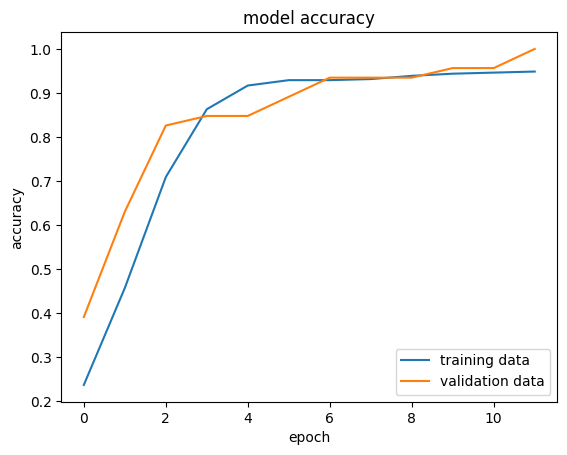

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')


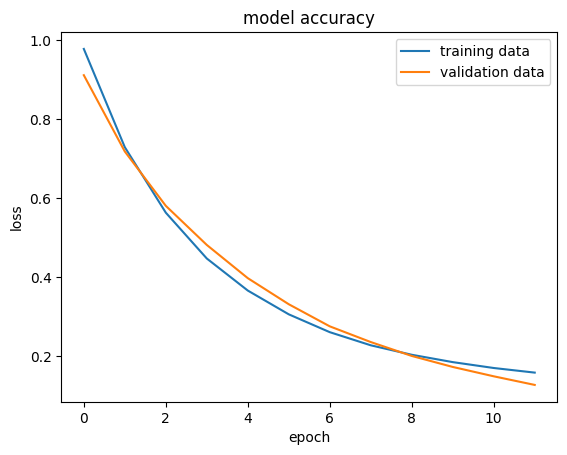

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')


In [26]:
loss, accuracy =  model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.1473 - accuracy: 0.9474
0.9473684430122375


In [27]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.71391933 -0.5261025  -0.76501797 -0.67641662 -1.4631347  -1.32835245
 -1.02460125 -0.97440558 -0.51582811 -0.76857991 -0.18420383 -0.98537833
 -0.31244427 -0.31087627 -0.13958665 -1.04156181 -0.85125732 -0.89034522
  0.20378977 -0.41692465 -0.63628486 -1.00020612 -0.72215597 -0.60854193
 -1.4476337  -1.2402875  -1.20116001 -1.12633291 -0.30213468 -0.88924065]


In [28]:
Y_pred = model.predict(X_test_std)


4/4 [==============================] - 0s 3ms/step


In [29]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.25488496 0.96325743]


In [30]:
print(X_test_std)

[[-0.71391933 -0.5261025  -0.76501797 ... -1.12633291 -0.30213468
  -0.88924065]
 [ 0.36514155  3.31400254  0.44839321 ...  1.29427131  1.0111995
   2.02206099]
 [-0.63863601  0.51251899 -0.65055285 ... -0.67126907 -0.7948452
   0.06872553]
 ...
 [-0.68882489 -0.41199386 -0.67643895 ... -0.23632866 -0.72758097
  -0.36894667]
 [ 0.87260688  0.8688174   0.7436566  ... -0.52064828 -0.77130272
  -1.06229981]
 [-0.17578302  0.58471017 -0.22060082 ... -0.83256138 -0.78139235
  -0.77814784]]


In [31]:
print(Y_pred)

[[0.25488496 0.96325743]
 [0.8928127  0.08953519]
 [0.4198812  0.92862266]
 [0.30258232 0.60694534]
 [0.3797831  0.7842592 ]
 [0.781801   0.21813361]
 [0.40691978 0.7573777 ]
 [0.18616876 0.82867897]
 [0.57943344 0.24681556]
 [0.20113869 0.8869393 ]
 [0.83296925 0.31546777]
 [0.7844981  0.2206459 ]
 [0.5465697  0.48475105]
 [0.25921687 0.9654581 ]
 [0.39763898 0.8463375 ]
 [0.48453373 0.7561502 ]
 [0.2714586  0.90541005]
 [0.46612218 0.7451293 ]
 [0.8904674  0.13871008]
 [0.68664026 0.2532265 ]
 [0.98551005 0.01670973]
 [0.84445196 0.19301786]
 [0.9900209  0.01253527]
 [0.42044535 0.9406463 ]
 [0.37376413 0.62652946]
 [0.58133096 0.5178694 ]
 [0.86467886 0.11138481]
 [0.37703514 0.87682647]
 [0.18371475 0.9512048 ]
 [0.3477392  0.4024841 ]
 [0.09820843 0.913908  ]
 [0.16480562 0.7181613 ]
 [0.26471177 0.6940348 ]
 [0.64573175 0.55100256]
 [0.36593542 0.71542466]
 [0.8642482  0.10713061]
 [0.61840975 0.88676727]
 [0.17435645 0.9152942 ]
 [0.19659334 0.96754885]
 [0.21875215 0.9275663 ]


In [32]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


**Building the predictive model**

In [33]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 22ms/step
[[0.1743564 0.9152941]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
